CS575 Project_Google dataset

Name- Vipin Gupta

Roll- 2011MT22

#Downloading & Exporting the dataset

In [ ]:
from pandas_datareader import data as pdr
from datetime import datetime

In [ ]:
#download data
google = pdr.DataReader('GOOGL', 'yahoo', start=datetime(2014, 8, 1), end=datetime(2016, 11, 30))

In [ ]:
#print first few lines of data
print(google.head())

                  High         Low        Open       Close   Volume   Adj Close
Date                                                                           
2014-08-01  583.429993  570.299988  578.549988  573.599976  2213300  573.599976
2014-08-04  583.820007  572.260010  576.510010  582.270020  1519400  582.270020
2014-08-05  580.200012  570.309998  579.380005  573.140015  1643800  573.140015
2014-08-06  578.640015  567.450012  569.500000  574.489990  1322800  574.489990
2014-08-07  578.309998  569.429993  576.049988  571.809998  1163000  571.809998


In [ ]:
#export and save as csv files
google.to_csv('Google_stock.csv', sep=',')

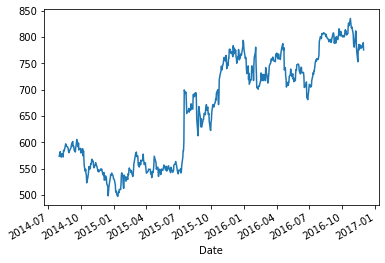

In [ ]:
#Visulaizing the close data
import matplotlib.pyplot as plt
google["Close"].plot()

#Statistical analysis like ACF, PACF, ADF, KPSS Test

In [ ]:
#Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller,kpss
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
#ADF Test

def adf_test(atr):
  
    #Perform Dickey-Fuller test:
    timeseries = google[atr].dropna()
    print ('Results of Dickey-Fuller Test for ',atr,'\n')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

#apply adf test on the series
adf_test('Close')

Results of Dickey-Fuller Test for  Close 

Test Statistic                  -1.092577
p-value                          0.718023
#Lags Used                       3.000000
Number of Observations Used    585.000000
Critical Value (1%)             -3.441578
Critical Value (5%)             -2.866493
Critical Value (10%)            -2.569408
dtype: float64


The p value obtained is greater than significance level of 0.05  and test statistic is higher than any of the critical values 

so we cant reject the null hypothesis so the time series is non stationary.

In [ ]:
#KPSS Test

def kpss_test(atr):
    timeseries = google[atr].dropna()
    print ('Results of KPSS Test for ',atr)
    kpsstest = kpss(timeseries, regression='c')
    kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','Lags Used'])
    for key,value in kpsstest[3].items():
        kpss_output['Critical Value (%s)'%key] = value
    print (kpss_output)
    
kpss_test('Close')

Results of KPSS Test for  Close
Test Statistic            2.648792
p-value                   0.010000
Lags Used                19.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1685: FutureWarning: The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'
  warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1709: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


The p value is significant less than 0.05 hence we can reject the null hypothesis so series is non stationary

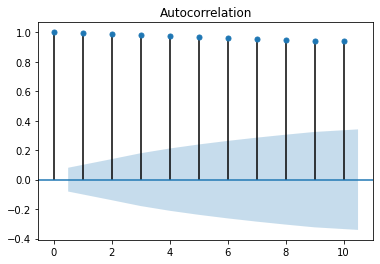

In [ ]:
# ACF Test of differenced data
plot_acf(google['Close'].dropna(), lags=10)
plt.show()


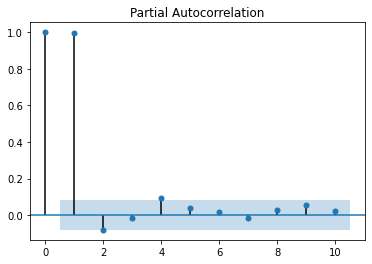

In [ ]:
# PACF Test of differenced data
plot_pacf(google['Close'].dropna(), lags=10)
plt.show()

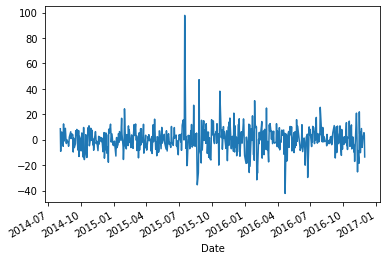

In [ ]:
#Differencing to make data as stationary

#Differencing the data
google['diff'] = google['Close'].diff(periods=1)

#Visulaizing the differenced data
google["diff"].plot()


In [ ]:
# ADF Test of differenced data
adf_test('diff')


Results of Dickey-Fuller Test for  diff 

Test Statistic                -1.479016e+01
p-value                        2.177423e-27
#Lags Used                     2.000000e+00
Number of Observations Used    5.850000e+02
Critical Value (1%)           -3.441578e+00
Critical Value (5%)           -2.866493e+00
Critical Value (10%)          -2.569408e+00
dtype: float64


In [ ]:
# KPSS Test of differenced data
kpss_test('diff')


Results of KPSS Test for  diff
Test Statistic            0.073196
p-value                   0.100000
Lags Used                19.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1685: FutureWarning: The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'
  warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1711: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


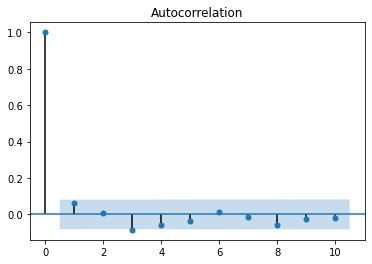

In [ ]:
# ACF Test of differenced data
plot_acf(google['diff'].dropna(), lags=10)
plt.show()


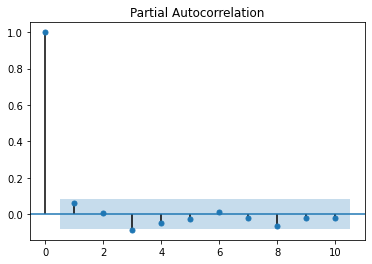

In [ ]:
# PACF Test of differenced data
plot_pacf(google['diff'].dropna(), lags=10)
plt.show()

#Exponential

In [ ]:
import numpy as np
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [ ]:
n = int(len(google["Close"])*0.8)
data = google['Close'].to_numpy()
train2 = data[:n]
test2 = data[n:]
date = (google.index)

In [ ]:
Exp_model = ExponentialSmoothing(google.Close,trend='mul',seasonal='mul',seasonal_periods=4)
google['Pred_Exp'] = Exp_model.fit(smoothing_level = 0.9,smoothing_slope= 0.1,smoothing_seasonal = 0.2).fittedvalues.shift(0)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Text(0.5, 1.0, 'Prediction using Exponential Smoothing')

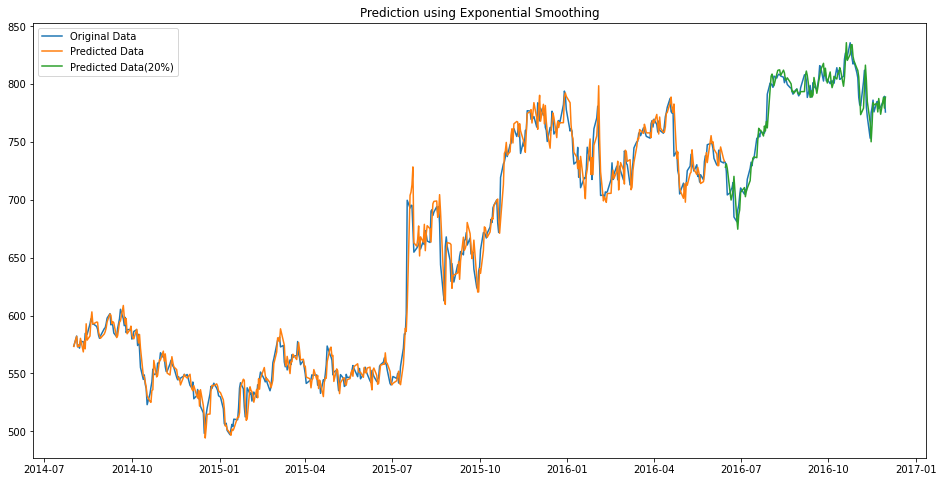

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(date,data, label='Original Data')
plt.plot(date[:n],google.Pred_Exp[:n], label='Predicted Data')
plt.plot(date[n:],google.Pred_Exp[n:], label='Predicted Data(20%)')
plt.legend()
plt.title('Prediction using Exponential Smoothing')

In [ ]:
#Calculation of MSE for comparing the model
rmse2 = (np.mean(np.power((np.array(test2)-np.array(google.Pred_Exp[n:])),2)))
print('MSE value using Exponential Smoothing model: ',rmse2)

MSE value using Exponential Smoothing model:  91.8678384539808


#ARIMA

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from pandas.plotting import lag_plot
from pandas import datetime
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  """


In [ ]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Importing data
df = pd.read_csv('Google_stock.csv')
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2014-08-01,583.429993,570.299988,578.549988,573.599976,2213300,573.599976
1,2014-08-04,583.820007,572.260010,576.510010,582.270020,1519400,582.270020
2,2014-08-05,580.200012,570.309998,579.380005,573.140015,1643800,573.140015
3,2014-08-06,578.640015,567.450012,569.500000,574.489990,1322800,574.489990
4,2014-08-07,578.309998,569.429993,576.049988,571.809998,1163000,571.809998


In [ ]:
# Extracting the required columns
df = df[['Date', 'Close']]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 589 entries, 0 to 588
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    589 non-null    object 
 1   Close   589 non-null    float64
dtypes: float64(1), object(1)
memory usage: 9.3+ KB


In [ ]:
# Changing the Date column to proper DateTime object
df.Date = pd.to_datetime(df.Date)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 589 entries, 0 to 588
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    589 non-null    datetime64[ns]
 1   Close   589 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 9.3 KB


In [ ]:
# Making Date column to be the index
df.columns=['Date','Closing price']
df.set_index('Date', inplace=True)
df.head()

,Closing price
Date,
2014-08-01,573.599976
2014-08-04,582.270020
2014-08-05,573.140015
2014-08-06,574.489990
2014-08-07,571.809998


Text(0.5, 0, 'Year')

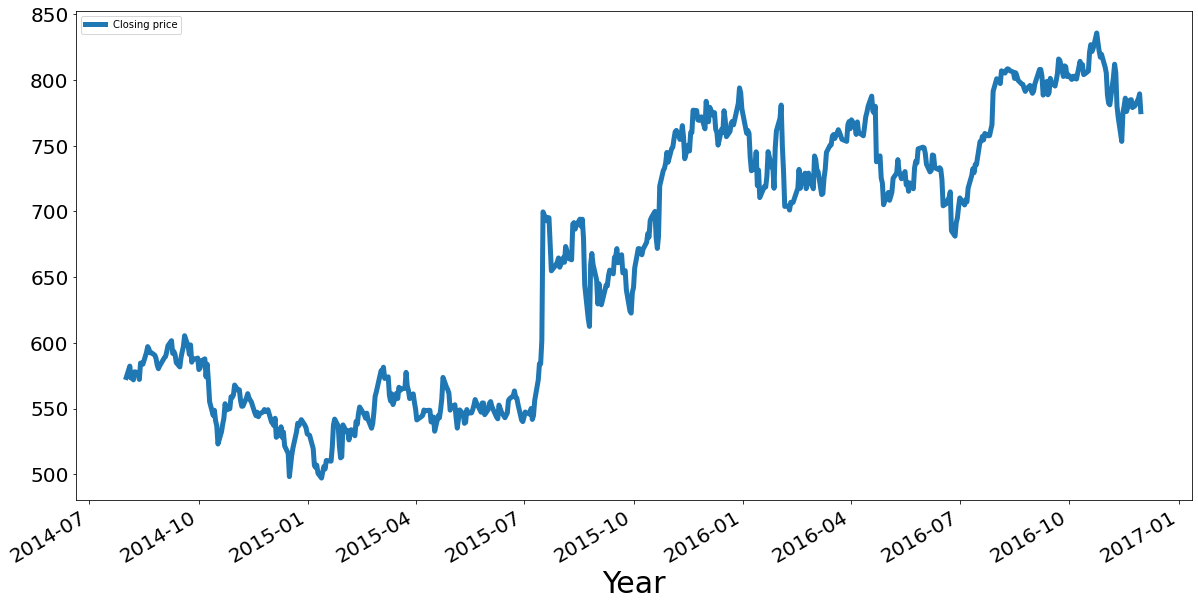

In [ ]:
# Plot
df.plot(figsize=(20,10), linewidth=5,fontsize=20);
plt.xlabel('Year', fontsize=30)

Text(0.5, 0, 'Year')

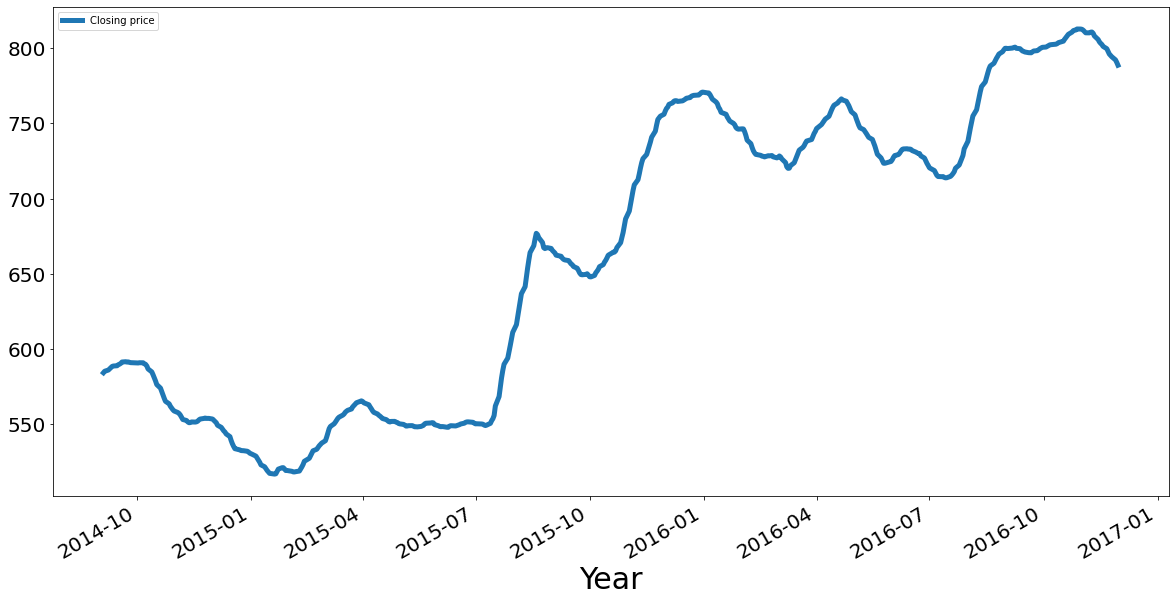

In [ ]:
# Seeing the trend more clearly
df.rolling(24).mean().plot(figsize=(20,10), linewidth=5,fontsize=20);
plt.xlabel('Year', fontsize=30)
# Overall a rise here

Text(0.5, 0, 'Year')

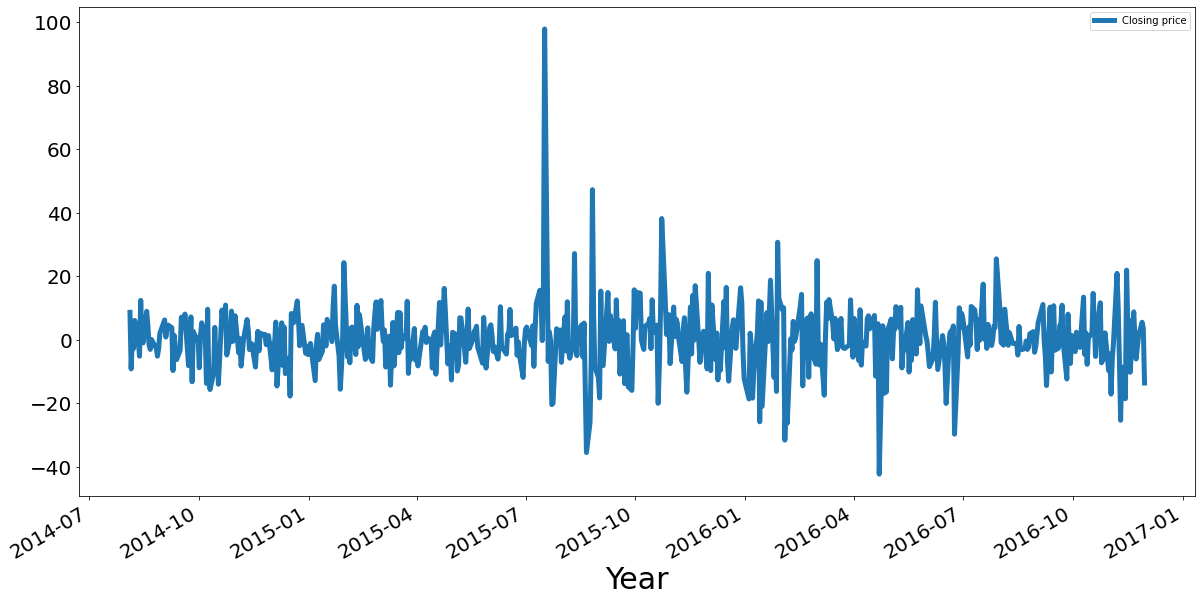

In [ ]:
# We can see that there is no specific seasonality here
# Removing trend
df.diff().plot(figsize=(20,10), linewidth=5,fontsize=20);
plt.xlabel('Year', fontsize=30)

Text(0.5, 0, 'Year')

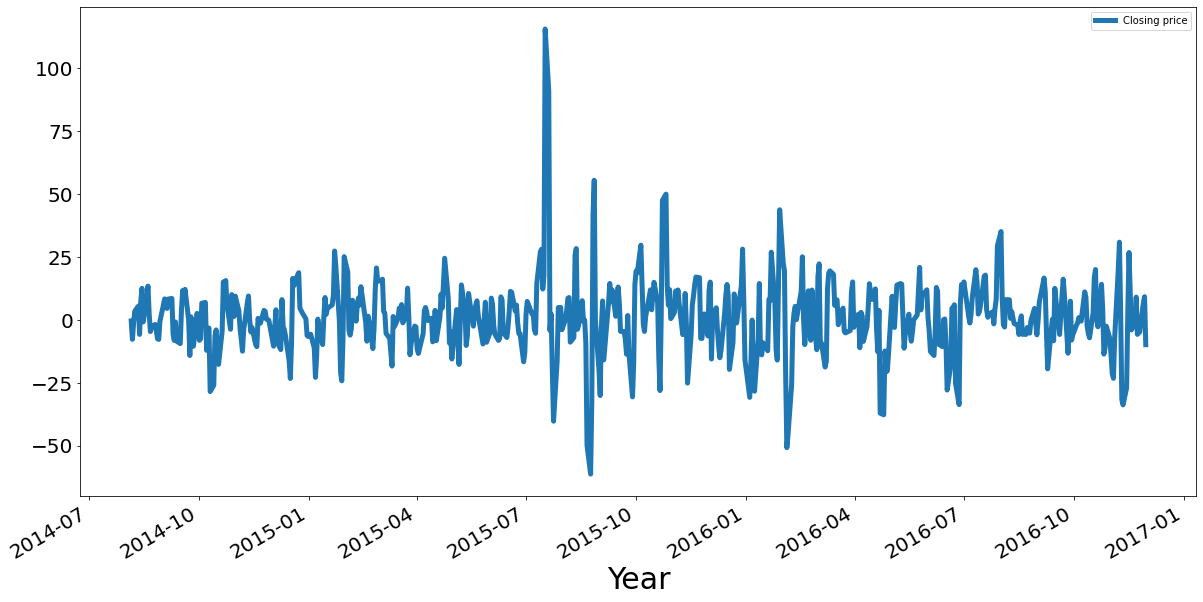

In [ ]:
# 2nd order differencing
df.diff(periods=2).plot(figsize=(20,10), linewidth=5,fontsize=20);
plt.xlabel('Year', fontsize=30)

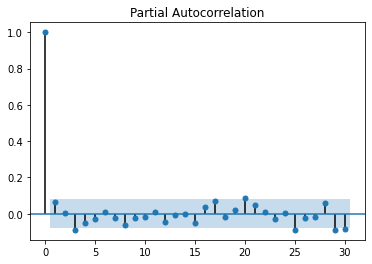

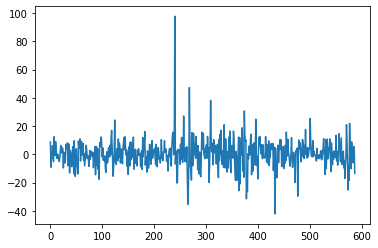

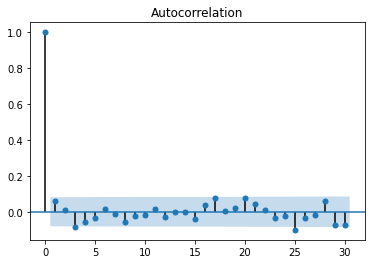

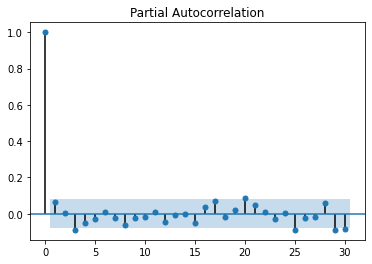

In [ ]:
# Let's take a look at its auto-corelation plots
# Before that we'll have to do manual differencing
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

def difference(data, lag):
    diff= []
    
    for i in range(lag, len(data)):
        value = data[i] - data[i-lag]
        diff.append(value)
    return pd.Series(diff)

df_close = df['Closing price']
X = df_close.values
diff = difference(X,1)
plt.plot(diff)
df_diff = pd.DataFrame(diff)
plot_acf(df_diff, lags=30)
plot_pacf(df_diff, lags=30)

In [ ]:
# Forecasting
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima_model import ARIMA
df = df.astype(np.float64) 
Y = df.values
size = int(len(Y)*0.66)
train, test = Y[0:size], Y[size:len(Y)]


In [ ]:
history = [x for x in train]
predictions = list()

for t in range(len(test)):
    model = ARIMA(history, order=(0,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    pred = output[0]
    predictions.append(pred)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f'%(pred, obs))


predicted=718.012211, expected=731.969971
predicted=732.378141, expected=717.510010
predicted=717.879958, expected=722.109985
predicted=722.490780, expected=729.049988
predicted=729.447558, expected=717.289978
predicted=717.656534, expected=720.900024
predicted=721.274834, expected=729.119995
predicted=729.514716, expected=724.859985
predicted=725.242922, expected=717.219971
predicted=717.582647, expected=742.169983
predicted=742.594593, expected=739.479980
predicted=739.896764, expected=731.590027
predicted=731.985992, expected=730.219971
predicted=730.611521, expected=712.799988
predicted=713.147120, expected=713.530029
predicted=713.878114, expected=725.409973
predicted=725.786673, expected=732.169983
predicted=732.562483, expected=744.869995
predicted=745.292884, expected=750.239990
predicted=750.675064, expected=750.570007
predicted=751.004823, expected=757.359985
predicted=757.810378, expected=758.479980
predicted=758.932010, expected=755.409973
predicted=755.853412, expected=762

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=757.972778, expected=764.320007
predicted=764.767707, expected=771.909973
predicted=772.374399, expected=775.390015
predicted=775.861487, expected=780.000000
predicted=780.481119, expected=787.679993
predicted=788.177853, expected=776.250000
predicted=776.720186, expected=774.919983
predicted=775.386001, expected=780.000000
predicted=780.476674, expected=737.770020
predicted=738.148292, expected=742.210022
predicted=742.597631, expected=725.369995
predicted=725.718091, expected=721.460022
predicted=721.798374, expected=705.059998
predicted=705.360135, expected=707.880005
predicted=708.185882, expected=714.409973
predicted=714.729996, expected=708.440002
predicted=708.745762, expected=711.369995
predicted=711.681692, expected=714.710022
predicted=715.028555, expected=725.179993
predicted=725.521389, expected=729.130005
predicted=729.479511, expected=739.380005
predicted=739.751709, expected=730.549988
predicted=730.901107, expected=728.070007
predicted=728.414807, expected=724

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=799.366161, expected=797.250000
predicted=797.691996, expected=806.929993
predicted=807.390210, expected=805.229980
predicted=805.685945, expected=807.479980
predicted=807.939470, expected=808.489990
predicted=808.950559, expected=808.200012
predicted=808.659112, expected=807.049988
predicted=807.505945, expected=805.960022
predicted=806.412966, expected=801.190002
predicted=801.632785, expected=805.419983
predicted=805.870119, expected=802.750000
predicted=803.194089, expected=799.650024
predicted=800.087259, expected=796.950012
predicted=797.381190, expected=796.590027
predicted=797.019680, expected=793.599976
predicted=794.023053, expected=791.299988
predicted=791.717838, expected=793.219971
predicted=793.640699, expected=795.820007
predicted=796.244902, expected=791.919983
predicted=792.336624, expected=789.849976
predicted=790.261880, expected=791.400024
predicted=791.814093, expected=796.869995
predicted=797.293657, expected=808.020020
predicted=808.463997, expected=807

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


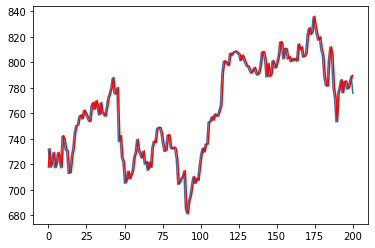

In [ ]:
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

In [ ]:
#Calculation of MSE for comparing the model
difference_array = np.subtract(test, predictions)
squared_array = np.square(difference_array)
mse = squared_array.mean()
mse

76.00429273259594

#LSTM

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout

importing the training data

In [ ]:
data = pd.read_csv('Google_stock.csv')


choosing the close column

In [ ]:
data["Close"]=pd.to_numeric(data.Close,errors='coerce') #turning the Close column to numeric
data = data.dropna() #romeving the NA values
trainData = data.iloc[:,4:5].values #selecting only the closing prices for training

scaling the values in the range of 0-1 for best preformances

In [ ]:
sc = MinMaxScaler(feature_range=(0,1))
trainData = sc.fit_transform(trainData)
trainData.shape

(589, 1)

preparing the data for LSTM

since its a time series problem we took 60 as timestep for our learning : given 60 closing values as an input data the 61st value is our output

In [ ]:
X_train = []
y_train = []

for i in range (60,589): #60 : timestep // 1149 : length of the data
    X_train.append(trainData[i-60:i,0]) 
    y_train.append(trainData[i,0])

X_train,y_train = np.array(X_train),np.array(y_train)

ps : LSTM take a 3D tensor (seq_len,timestep,batch_size)

In [ ]:
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1)) #adding the batch_size axis
X_train.shape

(529, 60, 1)

building the model

In [ ]:
model = Sequential()

model.add(LSTM(units=100, return_sequences = True, input_shape =(X_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = False))
model.add(Dropout(0.2))

model.add(Dense(units =1))
model.compile(optimizer='adam',loss="mean_squared_error")

In [ ]:
hist = model.fit(X_train, y_train, epochs = 20, batch_size = 32, verbose=2)


Epoch 1/20
17/17 - 10s - loss: 0.0973
Epoch 2/20
17/17 - 3s - loss: 0.0231
Epoch 3/20
17/17 - 3s - loss: 0.0129
Epoch 4/20
17/17 - 3s - loss: 0.0091
Epoch 5/20
17/17 - 3s - loss: 0.0093
Epoch 6/20
17/17 - 3s - loss: 0.0085
Epoch 7/20
17/17 - 3s - loss: 0.0091
Epoch 8/20
17/17 - 3s - loss: 0.0082
Epoch 9/20
17/17 - 3s - loss: 0.0086
Epoch 10/20
17/17 - 3s - loss: 0.0090
Epoch 11/20
17/17 - 3s - loss: 0.0084
Epoch 12/20
17/17 - 3s - loss: 0.0078
Epoch 13/20
17/17 - 3s - loss: 0.0078
Epoch 14/20
17/17 - 3s - loss: 0.0070
Epoch 15/20
17/17 - 3s - loss: 0.0069
Epoch 16/20
17/17 - 3s - loss: 0.0069
Epoch 17/20
17/17 - 3s - loss: 0.0071
Epoch 18/20
17/17 - 3s - loss: 0.0067
Epoch 19/20
17/17 - 3s - loss: 0.0067
Epoch 20/20
17/17 - 3s - loss: 0.0067


ploting the training loss

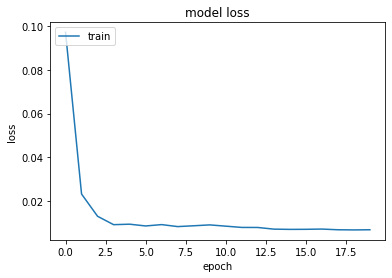

In [ ]:
plt.plot(hist.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

testing the model on new data

In [ ]:
testData = pd.read_csv('Google_stock.csv') #importing the test data
testData["Close"]=pd.to_numeric(testData.Close,errors='coerce') #turning the close column to numerical type
testData = testData.dropna() #droping the NA values
testData = testData.iloc[:,4:5] #selecting the closing prices for testing
y_test = testData.iloc[60:,0:].values #selecting the labels 
#input array for the model
inputClosing = testData.iloc[:,0:].values 
inputClosing_scaled = sc.transform(inputClosing)
inputClosing_scaled.shape
X_test = []
length = len(testData)
timestep = 60
for i in range(timestep,length): #doing the same preivous preprocessing 
    X_test.append(inputClosing_scaled[i-timestep:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
X_test.shape

(529, 60, 1)

In [ ]:
y_pred = model.predict(X_test) #predicting the new values


In [ ]:
predicted_price = sc.inverse_transform(y_pred) #inversing the scaling transformation for ploting


ploting the results

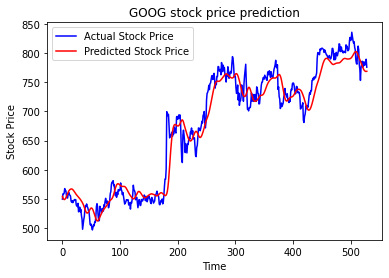

In [ ]:
plt.plot(y_test, color = 'blue', label = 'Actual Stock Price')
plt.plot(predicted_price, color = 'red', label = 'Predicted Stock Price')
plt.title('GOOG stock price prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [ ]:
#Calculation of MSE for comparing the model
difference_array = np.subtract(y_test, predicted_price)
squared_array = np.square(difference_array)
mse = squared_array.mean()
mse

563.0632418355867